In [1]:
import tellurium as te

/home/mgauder/anaconda2/lib/python2.7/site-packages/tellurium/notebooks/__init__.py:16: UserWarning: Notebook tools are not imported, due to missing dependencies.
  warnings.warn("Notebook tools are not imported, due to missing dependencies.")


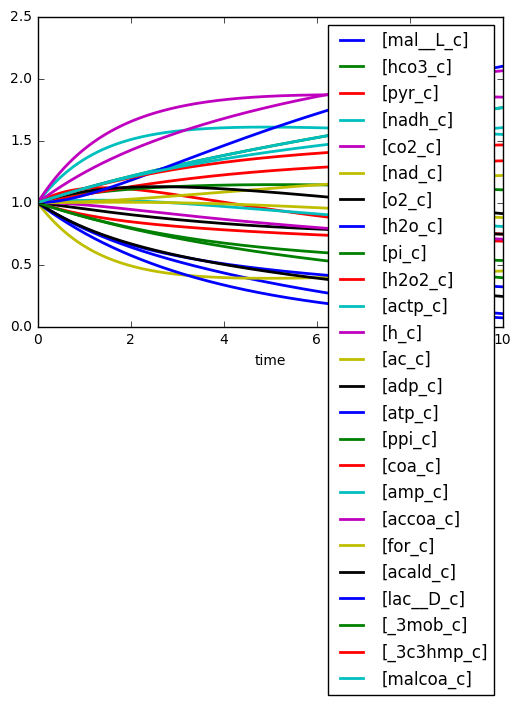

<module 'matplotlib.pyplot' from '/home/mgauder/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [10]:
# load model
path2sbml_g4 = "g4_squeezer.xml"
model_g4 = te.loadSBMLModel(path2sbml_g4)

# simulate model
sim_g4 = model_g4.simulate(0,10,100000)

# plot 
model_g4.plot(sim_g4)

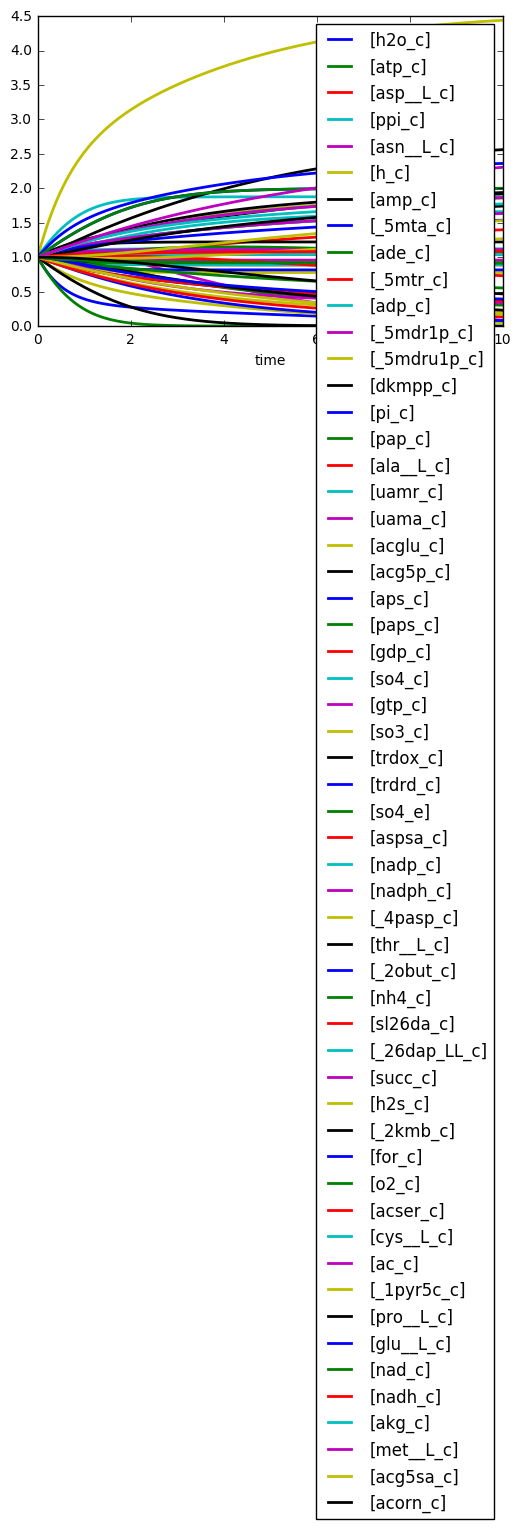

<module 'matplotlib.pyplot' from '/home/mgauder/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [11]:
# load model
path2sbml_g6 = "g6_squeezer.xml"
model_g6 = te.loadSBMLModel(path2sbml_g6)

# simulate model
sim_g6 = model_g6.simulate(0,10,100000)

# plot 
model_g6.plot(sim_g6)

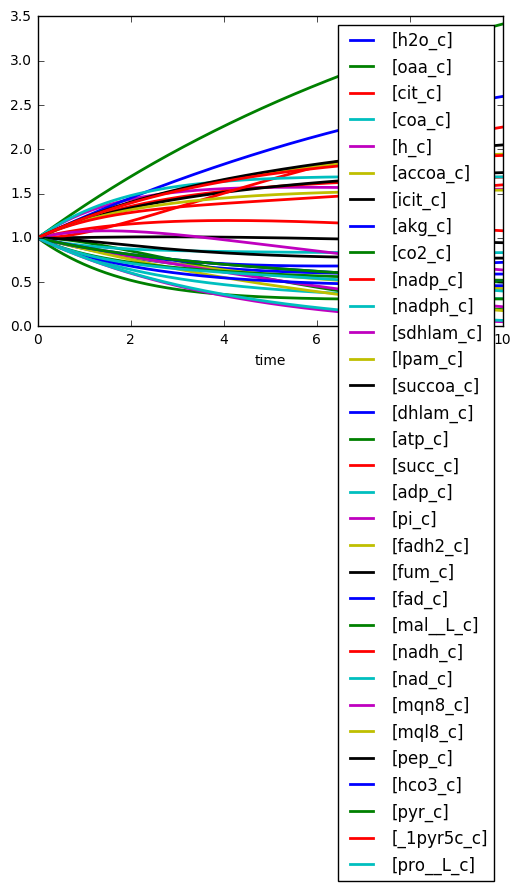

<module 'matplotlib.pyplot' from '/home/mgauder/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [12]:
# load model
path2sbml_g12 = "g12_squeezer.xml"
model_g12 = te.loadSBMLModel(path2sbml_g12)

# simulate model
sim_g12 = model_g12.simulate(0,10,100000)

# plot 
model_g12.plot(sim_g12)

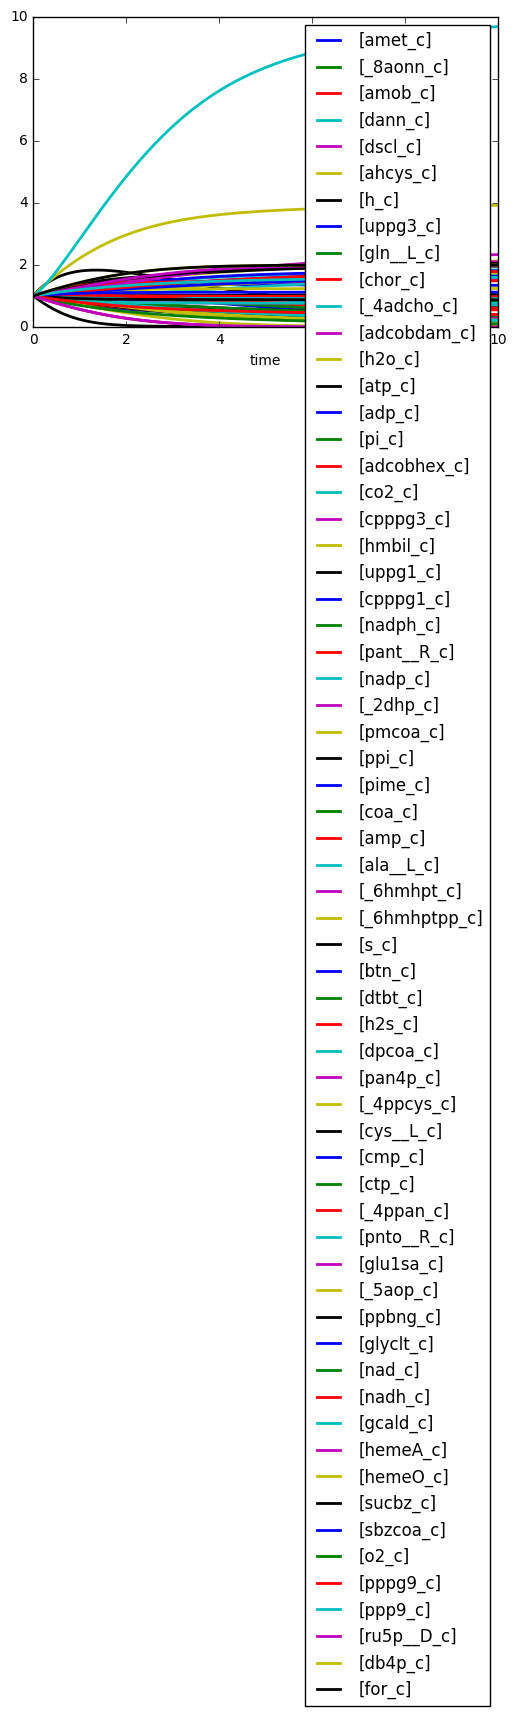

<module 'matplotlib.pyplot' from '/home/mgauder/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [13]:
# load model
path2sbml_g14 = "g14_squeezer.xml"
model_g14 = te.loadSBMLModel(path2sbml_g14)

# simulate model
sim_g14 = model_g14.simulate(0,10,100000)

# plot 
model_g14.plot(sim_g14)

In [18]:
matrix_g4 = model_g4.getFullStoichiometryMatrix()

In [19]:
from numpy.linalg import matrix_rank
matrix_rank(matrix_g4)

11